<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB9_CLASS_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
# 데이터프레임 생성
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 데이터 부르는 다른 방법
from sklearn import datasets
datasets.load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# 컬럼이름 변경
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# x and y split
y = df['target']
x = df.drop('target', axis=1)

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
# 의사결정모델 (나무의 깊이를 조절하고 싶을 때는 이 단계에서 조절함)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [39]:
# 평가
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [13]:
# 평가하는 다른 방법
model.score(x_test, y_test)

1.0

In [14]:
# 교차검증
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_test, y_test, cv=5)

array([1.        , 0.83333333, 1.        , 0.83333333, 1.        ])

In [15]:
# 분류리포트
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



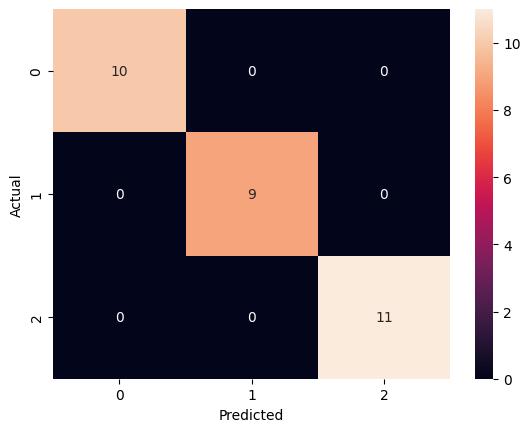

In [20]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

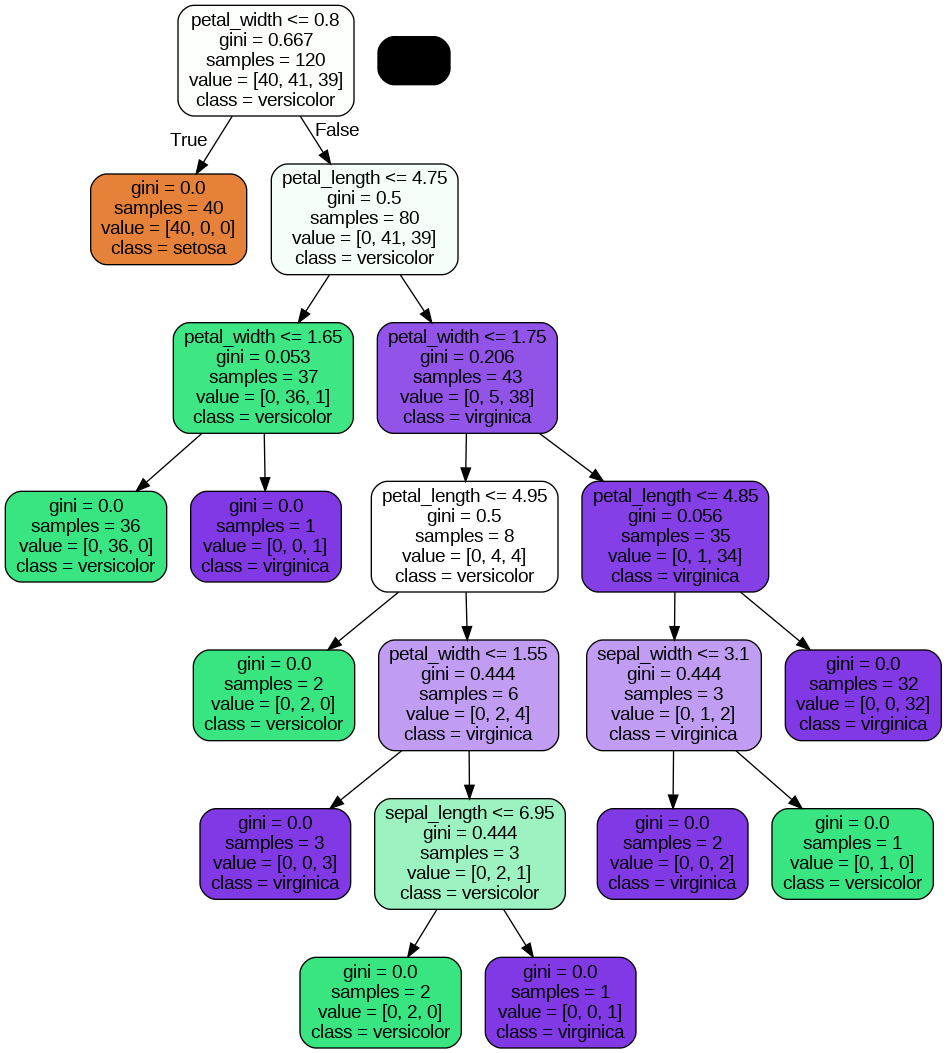

In [40]:
# 의사결정트리 시각화
from IPython.display import Image
from sklearn import tree
import pydotplus
dot_data=tree.export_graphviz(model,out_file=None,feature_names=df.columns[:-1],class_names=iris.target_names, filled=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 피마 인디언 당뇨병 예측

In [44]:
# 데이터 생성
df = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
# 컬럼이름 변경
df.columns = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]

In [47]:
# x and y split
y = df['class']
x = df.drop('class', axis=1)

In [48]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
# 의사결정트리 모델
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
# 모델 평가
model.score(x_test, y_test)

0.7532467532467533

In [51]:
# 교차검증
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_test, y_test, cv=5)

array([0.61290323, 0.74193548, 0.74193548, 0.70967742, 0.63333333])

In [53]:
# 분류리포트
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



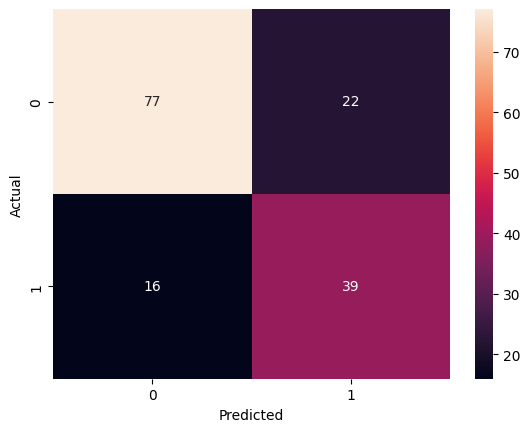

In [54]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

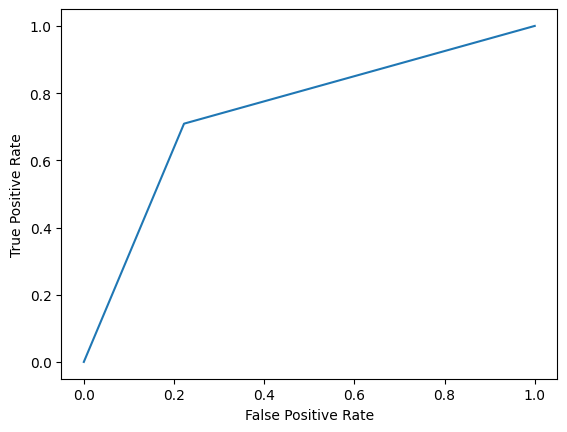

In [57]:
# ROC 커브
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

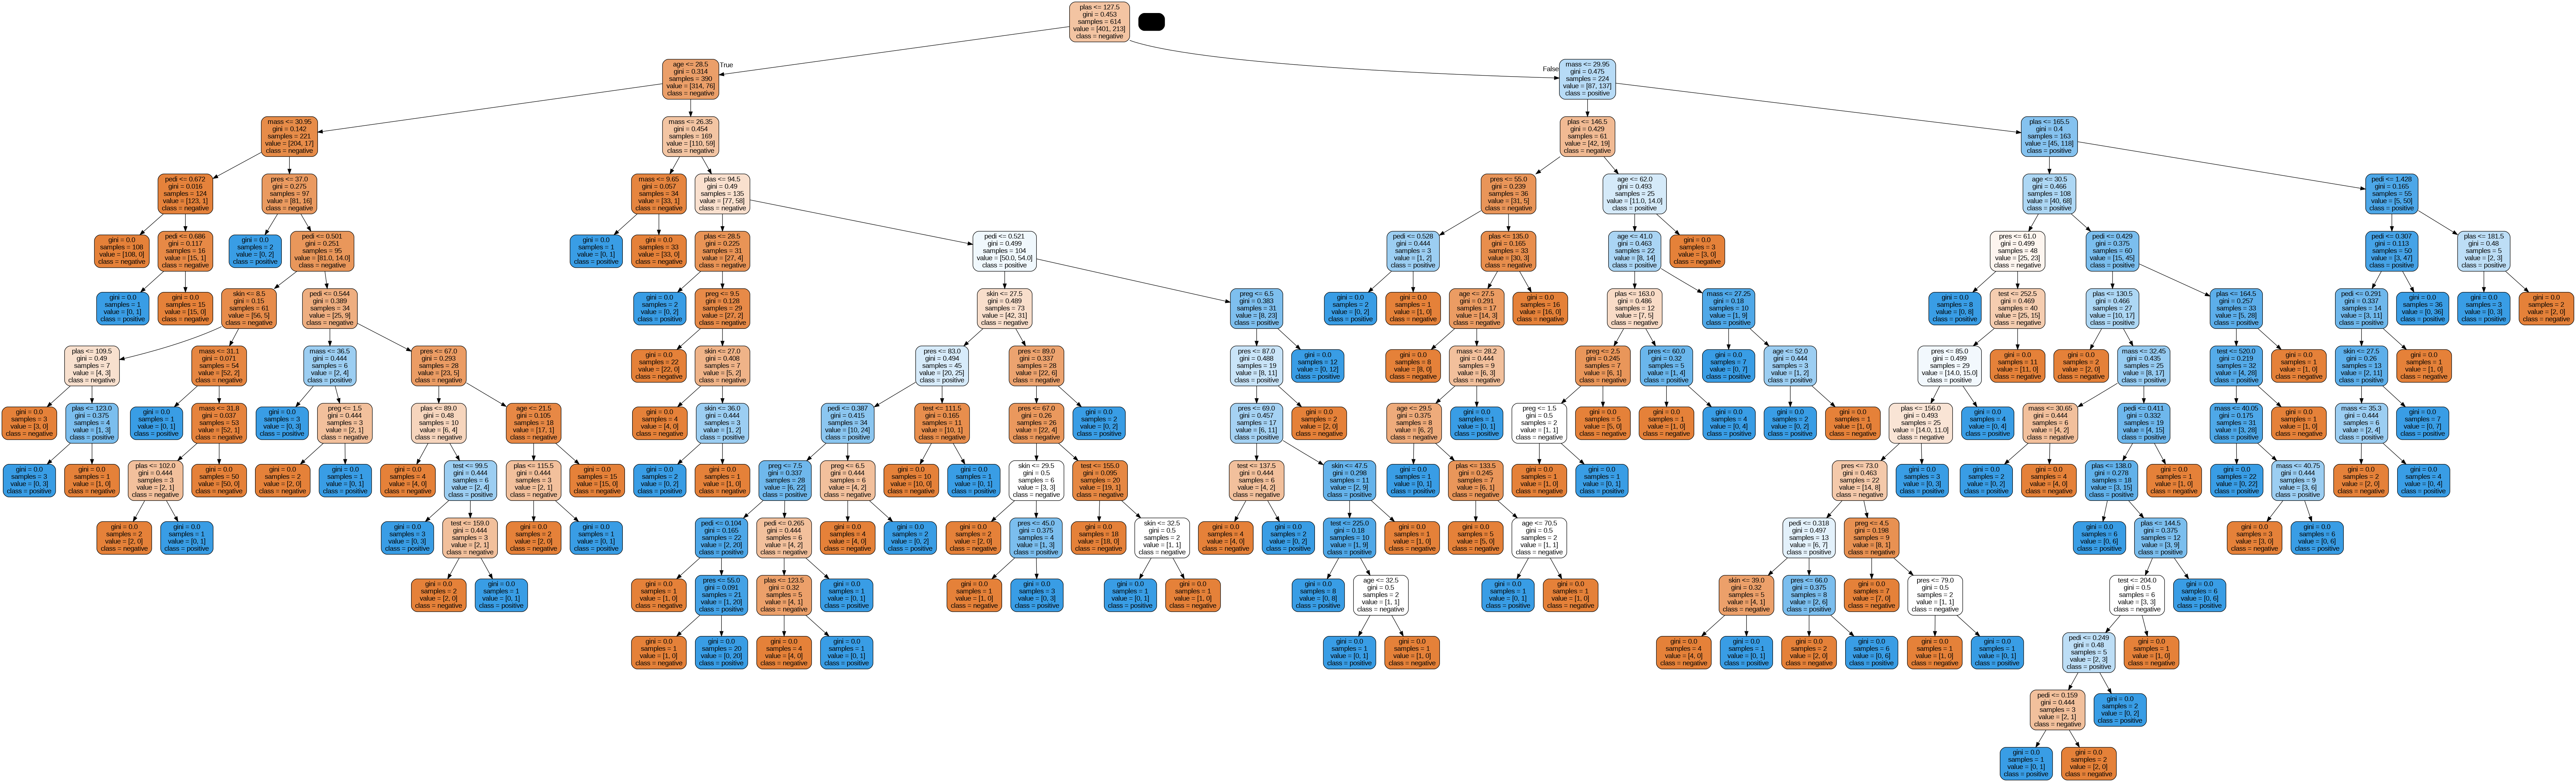

In [60]:
# 의사결정트리 시각화
from IPython.display import Image
from sklearn import tree
import pydotplus
dot_data=tree.export_graphviz(model,out_file=None,feature_names=df.columns[:-1],class_names=['negative', 'positive'], filled=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())